In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [4]:
# importar dados
dataset = pd.read_csv("tempo.csv", sep=";")

# visualizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
# Regra de Negócio

# trataro dados de 'tempo.csv'

# Aparência: sol, nublado, chuva
# Temperatura: -130~130F
# Umidade: 0~100
# Jogar: sim/nao
# Tratar valores Nas

In [9]:
# tamanho
dataset.shape

(14, 5)

In [10]:
# verificando se existem dados NAs
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [8]:
# Aparencia

# visualizando
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

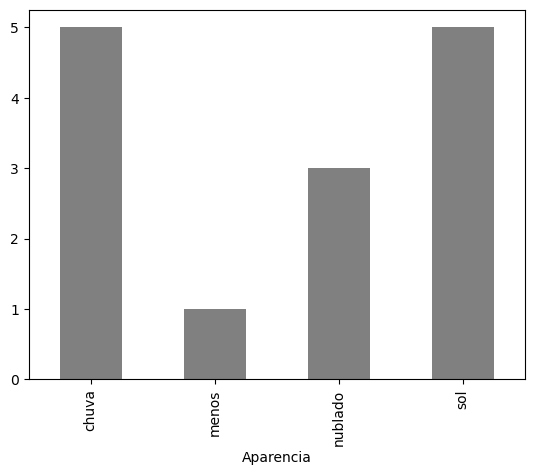

In [9]:
# visualizando dados acima em gráfico de barras
agrupado.plot.bar(color = 'gray')


In [8]:
# tratando Aparencia

# atribuindo valor 'menos' para 'sol'
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'

# verificando novamente
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [12]:
# Temperatura (regra de negócio -> Entre -130 e 130F)

dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

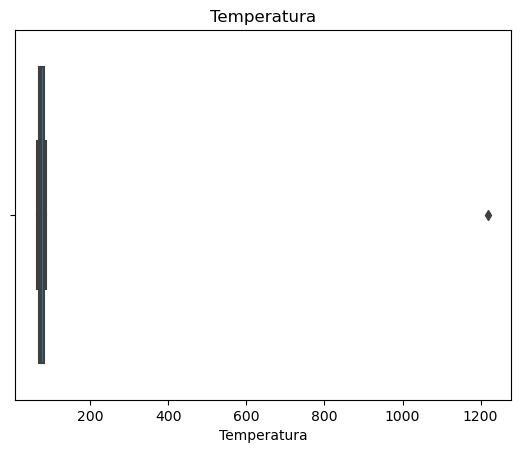

In [13]:
# visualizando dados acim através de um boxplot
srn.boxplot(x=dataset['Temperatura']).set_title('Temperatura')

C:\Users\Julia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperatura')

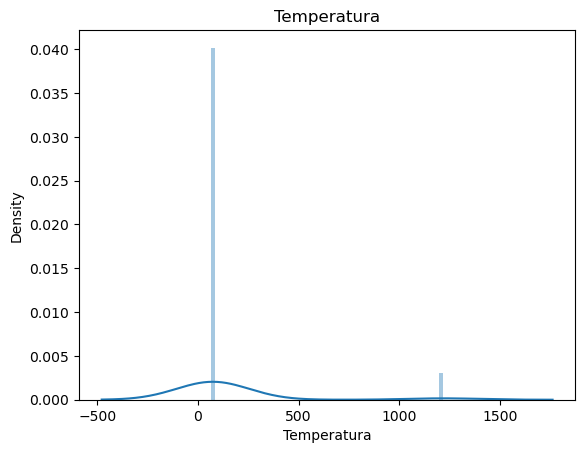

In [14]:
# visualizando dados acim através de um distplot
srn.distplot(dataset['Temperatura']).set_title('Temperatura')

In [15]:
# verificando se existem temperatura com valores anormais
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [16]:
# calculando a mediana
mediana = sts.median(dataset['Temperatura'])
mediana

# substituir valor anormal pela mediana
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)] = mediana

# veriricando novamente
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]


,Aparencia,Temperatura,Umidade,Vento,Jogar


In [17]:
# verificando descricao Temperatura novamente
dataset['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [18]:
# Umidade

# visualizando descricao
dataset['Umidade'].describe()

count     13.000000
mean      88.115385
std       34.782751
min       65.000000
25%       70.000000
50%       80.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [19]:
# calculando a mediana
mediana = sts.median(dataset['Umidade'])
mediana

82.5

In [21]:
# substituindo valores NAs pela mediana
dataset['Umidade'].fillna(mediana, inplace=True)

# verificando se ainda existem NAs em Umidade
dataset['Umidade'].isnull().sum()

0

In [22]:
# verificando se existem valores anormais
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [23]:
# substituindo valores anormais pela mediana
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)] = mediana

# verificando novamente se existem valores anormais
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [24]:
# visualizando novamente descricao
dataset['Umidade'].describe()

count    14.000000
mean     79.321429
std       8.683776
min      65.000000
25%      70.875000
50%      81.250000
75%      85.750000
max      91.000000
Name: Umidade, dtype: float64

In [29]:
# Vento

# agrupando
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
73.5          1
82.5          1
FALSO         6
VERDADEIRO    6
dtype: int64

In [34]:
# tratando dados de vento

# substituindo valores anormais poer FALSO e VERDADEIRO
dataset.loc[dataset['Vento'] == 73.5, 'Vento'] = "VERDADEIRO"
dataset.loc[dataset['Vento'] == 82.5, 'Vento'] = "FALSO"

# agrupando novamente
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    7
dtype: int64

In [35]:
# verificando novamente se existem dados NAs
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [37]:
# Jogar

# agrupando
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
73.5    1
82.5    1
nao     4
sim     8
dtype: int64

In [38]:
# tratando valores errados para 'sim'
dataset.loc[dataset['Jogar'].isin([73.5, 82.5]), 'Jogar'] = 'sim'

# agrupando novamente
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao     4
sim    10
dtype: int64

In [39]:
# visualizando novamente
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,82.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,73.5,73.5,73.5,VERDADEIRO,sim
8,sol,69.0,70.0,FALSO,sim
9,82.5,82.5,82.5,FALSO,sim
